### 4. Our manager wants to classify the Order Regions based on the occurrence of late shipments and select the best Shipping Mode that consistently delivers shipments on time according to the schedule. Could you create a visualization that explores the relationship between them to provide insights for our manager's decision-making process?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

### Loading and reading dataset

In [2]:

encodings = ['utf-8', 'latin1', 'ISO-8859-1']

for encoding in encodings:
    try:
        df = pd.read_csv('ITBLogisticDataset.csv', encoding=encoding)
        print(f"File loaded successfully with encoding: {encoding}")
        break
    except UnicodeDecodeError as e:
        print(f"Failed to load with encoding {encoding}: {e}")

if df is not None:
    print(df.head())
else:
    print("Failed to load the dataset with all attempted encodings.")

Failed to load with encoding utf-8: 'utf-8' codec can't decode byte 0xfa in position 2: invalid start byte
File loaded successfully with encoding: latin1
       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Cat

### Delete Customer Password, Product Image, Product Description

In [3]:
df = df.drop(columns=['Customer Password', 'Product Image', 'Product Description', 'Customer Email'])

In [4]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,NaN,1360,73,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Rajastán,PENDING,NaN,1360,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,Rajastán,CLOSED,NaN,1360,73,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Queensland,COMPLETE,NaN,1360,73,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Queensland,PENDING_PAYMENT,NaN,1360,73,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
# Handle missing values
df = df.dropna(subset=['Late_delivery_risk', 'Order Region', 'Shipping Mode'])

# Ensure 'Late_delivery_risk' is numeric and 'Order Region' and 'Shipping Mode' are categorical
df['Late_delivery_risk'] = df['Late_delivery_risk'].astype(int)
df['Order Region'] = df['Order Region'].astype(str)
df['Shipping Mode'] = df['Shipping Mode'].astype(str)

# Display the first few rows to ensure it's read correctly
print(df.head())

       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goo

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

# Mã hóa các biến phân loại
label_encoder_region = LabelEncoder()
df['Order Region Encoded'] = label_encoder_region.fit_transform(df['Order Region'])

label_encoder_shipping = LabelEncoder()
df['Shipping Mode Encoded'] = label_encoder_shipping.fit_transform(df['Shipping Mode'])

# Tạo ánh xạ từ mã hóa sang tên gốc
region_mapping = {i: region for i, region in enumerate(label_encoder_region.classes_)}
shipping_mapping = {i: mode for i, mode in enumerate(label_encoder_shipping.classes_)}

print("Ánh xạ từ mã hóa cột 'Order Region' thành tên gốc:")
for encoded, region in region_mapping.items():
    print(f"{encoded}: {region}")

print("\nÁnh xạ từ mã hóa cột 'Shipping Mode' thành tên gốc:")
for encoded, mode in shipping_mapping.items():
    print(f"{encoded}: {mode}")

Ánh xạ từ mã hóa cột 'Order Region' thành tên gốc:
0: Canada
1: Caribbean
2: Central Africa
3: Central America
4: Central Asia
5: East Africa
6: East of USA
7: Eastern Asia
8: Eastern Europe
9: North Africa
10: Northern Europe
11: Oceania
12: South America
13: South Asia
14: South of  USA 
15: Southeast Asia
16: Southern Africa
17: Southern Europe
18: US Center 
19: West Africa
20: West Asia
21: West of USA 
22: Western Europe

Ánh xạ từ mã hóa cột 'Shipping Mode' thành tên gốc:
0: First Class
1: Same Day
2: Second Class
3: Standard Class


In [8]:


# Chuyển đổi các mã hóa thành tên gốc
def convert_encoded_to_original(df, label_encoder_region, label_encoder_shipping):
    # Tạo ánh xạ từ mã hóa sang tên gốc
    region_mapping = {i: region for i, region in enumerate(label_encoder_region.classes_)}
    shipping_mapping = {i: shipping for i, shipping in enumerate(label_encoder_shipping.classes_)}

    # Ánh xạ mã hóa thành tên gốc
    df['Order Region'] = df['Order Region Encoded'].map(region_mapping)
    df['Shipping Mode'] = df['Shipping Mode Encoded'].map(shipping_mapping)
    
    return df[['Order Region', 'Shipping Mode', 'Late_delivery_risk']]

# Tạo DataFrame với tên gốc
df_original = convert_encoded_to_original(df, label_encoder_region, label_encoder_shipping)

In [9]:
#Tính tổng số đơn hàng của cả công ty và tổng số đơn hàng giao trễ của cả công ty
total_orders_company = df.shape[0]
total_late_orders_company = df[df['Late_delivery_risk'] == 1].shape[0]
print("\nTổng số đơn hàng của công ty:", total_orders_company)
print("Tổng số đơn hàng giao trễ của công ty:", total_late_orders_company)



Tổng số đơn hàng của công ty: 180519
Tổng số đơn hàng giao trễ của công ty: 98977


In [10]:

# Tính tổng số đơn hàng giao trễ của từng region
late_orders_by_region = df[df['Late_delivery_risk'] == 1].groupby('Order Region').size().reset_index(name='Late Orders')
print("Tổng số đơn hàng giao trễ của từng region:")
print(late_orders_by_region)

Tổng số đơn hàng giao trễ của từng region:
       Order Region  Late Orders
0            Canada          468
1         Caribbean         4415
2    Central Africa          972
3   Central America        15518
4      Central Asia          306
5       East Africa         1036
6       East of USA         3849
7      Eastern Asia         3955
8    Eastern Europe         2182
9      North Africa         1762
10  Northern Europe         5292
11          Oceania         5482
12    South America         8111
13       South Asia         4350
14   South of  USA          2256
15   Southeast Asia         5297
16  Southern Africa          617
17  Southern Europe         5129
18       US Center          3252
19      West Africa         1953
20        West Asia         3322
21     West of USA          4313
22   Western Europe        15140


In [11]:
# Tính tổng số đơn hàng của từng region
total_orders_by_region = df.groupby('Order Region').size().reset_index(name='Total Orders')
print("\nTổng số đơn hàng của từng region:")
print(total_orders_by_region)



Tổng số đơn hàng của từng region:
       Order Region  Total Orders
0            Canada           959
1         Caribbean          8318
2    Central Africa          1677
3   Central America         28341
4      Central Asia           553
5       East Africa          1852
6       East of USA          6915
7      Eastern Asia          7280
8    Eastern Europe          3920
9      North Africa          3232
10  Northern Europe          9792
11          Oceania         10148
12    South America         14935
13       South Asia          7731
14   South of  USA           4045
15   Southeast Asia          9539
16  Southern Africa          1157
17  Southern Europe          9431
18       US Center           5887
19      West Africa          3696
20        West Asia          6009
21     West of USA           7993
22   Western Europe         27109


In [12]:
# Kết hợp dữ liệu vào một bảng
region_summary = pd.merge(late_orders_by_region, total_orders_by_region, on='Order Region')
print("\nBảng tổng hợp đơn hàng trễ và tổng đơn hàng của từng region:")
print(region_summary)



Bảng tổng hợp đơn hàng trễ và tổng đơn hàng của từng region:
       Order Region  Late Orders  Total Orders
0            Canada          468           959
1         Caribbean         4415          8318
2    Central Africa          972          1677
3   Central America        15518         28341
4      Central Asia          306           553
5       East Africa         1036          1852
6       East of USA         3849          6915
7      Eastern Asia         3955          7280
8    Eastern Europe         2182          3920
9      North Africa         1762          3232
10  Northern Europe         5292          9792
11          Oceania         5482         10148
12    South America         8111         14935
13       South Asia         4350          7731
14   South of  USA          2256          4045
15   Southeast Asia         5297          9539
16  Southern Africa          617          1157
17  Southern Europe         5129          9431
18       US Center          3252          588

In [13]:
# Tính tỷ lệ phần trăm số lượng đơn hàng giao trễ so với tổng đơn hàng nhận được của từng region
region_summary['Late Percentage (of Region Total)'] = (region_summary['Late Orders'] / region_summary['Total Orders']) * 100
print("\nBảng tổng hợp với tỷ lệ phần trăm đơn hàng giao trễ so với tổng đơn hàng của từng region:")
print(region_summary)




Bảng tổng hợp với tỷ lệ phần trăm đơn hàng giao trễ so với tổng đơn hàng của từng region:
       Order Region  Late Orders  Total Orders  \
0            Canada          468           959   
1         Caribbean         4415          8318   
2    Central Africa          972          1677   
3   Central America        15518         28341   
4      Central Asia          306           553   
5       East Africa         1036          1852   
6       East of USA         3849          6915   
7      Eastern Asia         3955          7280   
8    Eastern Europe         2182          3920   
9      North Africa         1762          3232   
10  Northern Europe         5292          9792   
11          Oceania         5482         10148   
12    South America         8111         14935   
13       South Asia         4350          7731   
14   South of  USA          2256          4045   
15   Southeast Asia         5297          9539   
16  Southern Africa          617          1157   
17  South

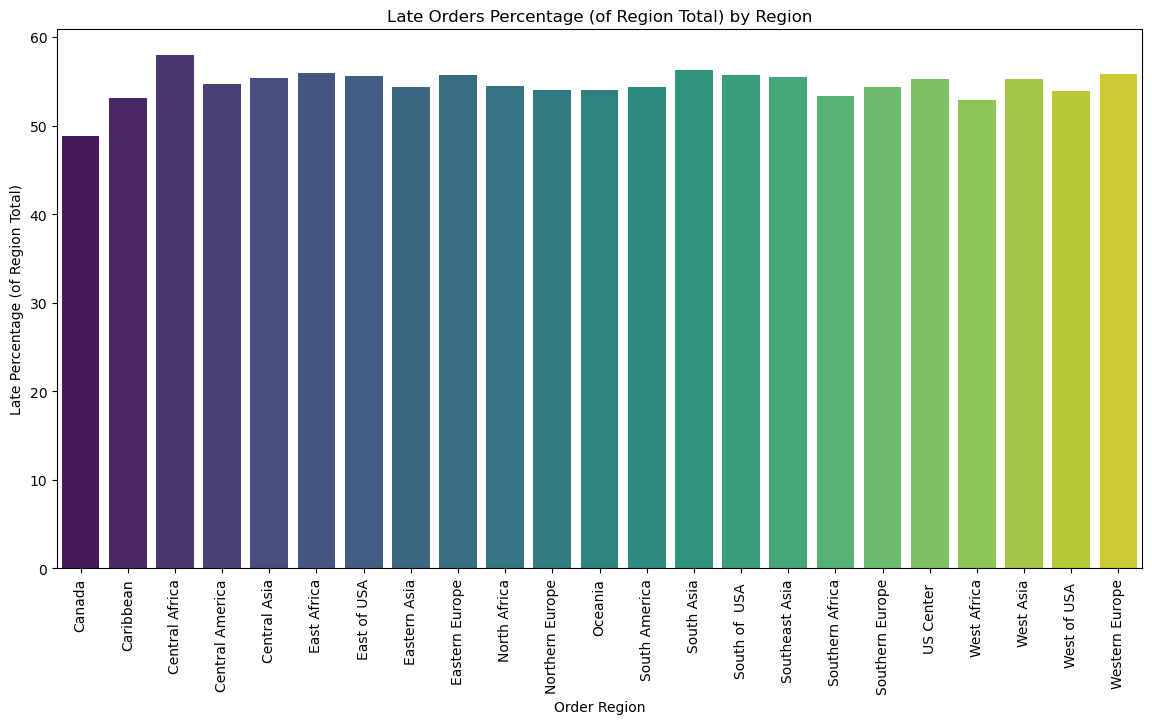

In [14]:

# Vẽ biểu đồ tỷ lệ phần trăm số lượng đơn hàng giao trễ so với tổng đơn hàng của từng region
plt.figure(figsize=(14, 7))
sns.barplot(x='Order Region', y='Late Percentage (of Region Total)', data=region_summary, palette='viridis')
plt.xticks(rotation=90)
plt.title('Late Orders Percentage (of Region Total) by Region')
plt.xlabel('Order Region')
plt.ylabel('Late Percentage (of Region Total)')
plt.show()

In [15]:

# Tính tỷ lệ phần trăm số lượng đơn hàng giao trễ của từng region so với tổng số đơn hàng giao trễ của cả công ty
region_summary['Late Percentage (of Total Late Orders)'] = (region_summary['Late Orders'] / total_late_orders_company) * 100
print("\nBảng tổng hợp với tỷ lệ phần trăm đơn hàng giao trễ so với tổng đơn hàng giao trễ của cả công ty:")
print(region_summary)



Bảng tổng hợp với tỷ lệ phần trăm đơn hàng giao trễ so với tổng đơn hàng giao trễ của cả công ty:
       Order Region  Late Orders  Total Orders  \
0            Canada          468           959   
1         Caribbean         4415          8318   
2    Central Africa          972          1677   
3   Central America        15518         28341   
4      Central Asia          306           553   
5       East Africa         1036          1852   
6       East of USA         3849          6915   
7      Eastern Asia         3955          7280   
8    Eastern Europe         2182          3920   
9      North Africa         1762          3232   
10  Northern Europe         5292          9792   
11          Oceania         5482         10148   
12    South America         8111         14935   
13       South Asia         4350          7731   
14   South of  USA          2256          4045   
15   Southeast Asia         5297          9539   
16  Southern Africa          617          1157   
1

In [16]:


# Sắp xếp các region theo tỷ lệ phần trăm số lượng đơn hàng giao trễ so với tổng số đơn hàng giao trễ của cả công ty
region_summary_sorted = region_summary.sort_values(by='Late Percentage (of Total Late Orders)', ascending=False)
print("\nBảng tổng hợp sắp xếp theo tỷ lệ phần trăm đơn hàng giao trễ so với tổng đơn hàng giao trễ của cả công ty:")
print(region_summary_sorted)





Bảng tổng hợp sắp xếp theo tỷ lệ phần trăm đơn hàng giao trễ so với tổng đơn hàng giao trễ của cả công ty:
       Order Region  Late Orders  Total Orders  \
3   Central America        15518         28341   
22   Western Europe        15140         27109   
12    South America         8111         14935   
11          Oceania         5482         10148   
15   Southeast Asia         5297          9539   
10  Northern Europe         5292          9792   
17  Southern Europe         5129          9431   
1         Caribbean         4415          8318   
13       South Asia         4350          7731   
21     West of USA          4313          7993   
7      Eastern Asia         3955          7280   
6       East of USA         3849          6915   
20        West Asia         3322          6009   
18       US Center          3252          5887   
14   South of  USA          2256          4045   
8    Eastern Europe         2182          3920   
19      West Africa         1953          

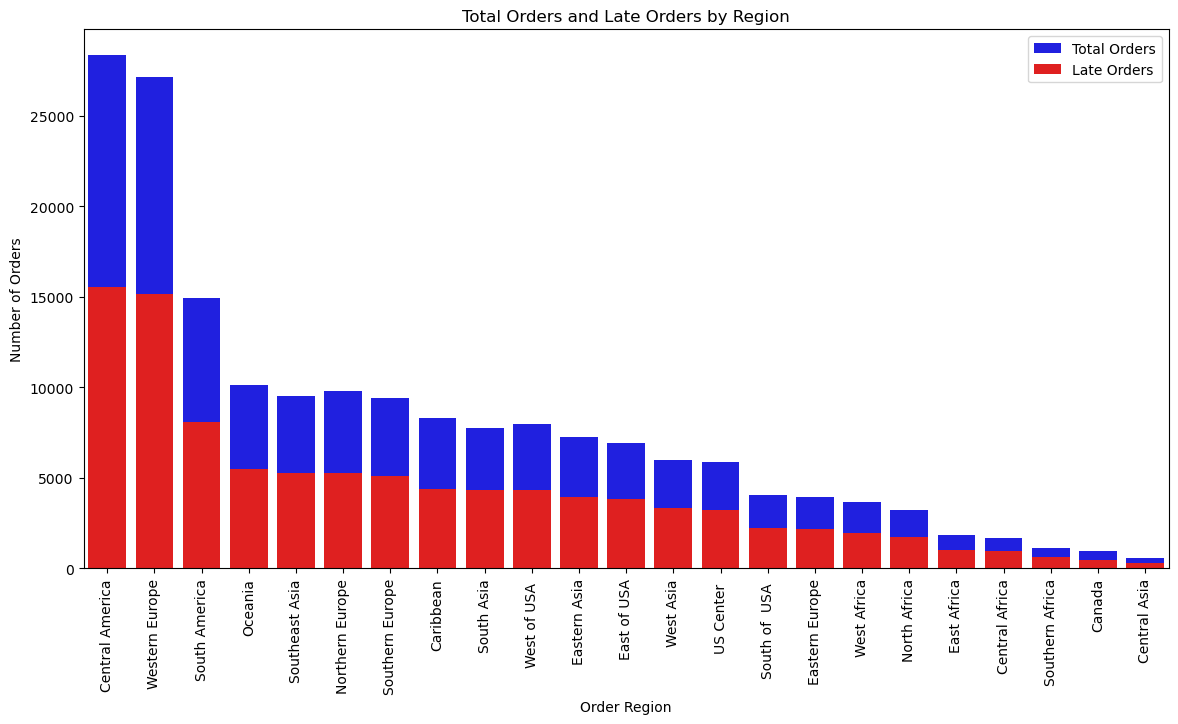

In [17]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Order Region', y='Total Orders', data=region_summary_sorted, color='b', label='Total Orders')
sns.barplot(x='Order Region', y='Late Orders', data=region_summary_sorted, color='r', label='Late Orders')
plt.xticks(rotation=90)
plt.title('Total Orders and Late Orders by Region')
plt.xlabel('Order Region')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()

[Text(0, 0, 'Central America'),
 Text(1, 0, 'Western Europe'),
 Text(2, 0, 'South America'),
 Text(3, 0, 'Oceania'),
 Text(4, 0, 'Southeast Asia'),
 Text(5, 0, 'Northern Europe'),
 Text(6, 0, 'Southern Europe'),
 Text(7, 0, 'Caribbean'),
 Text(8, 0, 'South Asia'),
 Text(9, 0, 'West of USA '),
 Text(10, 0, 'Eastern Asia'),
 Text(11, 0, 'East of USA'),
 Text(12, 0, 'West Asia'),
 Text(13, 0, 'US Center '),
 Text(14, 0, 'South of  USA '),
 Text(15, 0, 'Eastern Europe'),
 Text(16, 0, 'West Africa'),
 Text(17, 0, 'North Africa'),
 Text(18, 0, 'East Africa'),
 Text(19, 0, 'Central Africa'),
 Text(20, 0, 'Southern Africa'),
 Text(21, 0, 'Canada'),
 Text(22, 0, 'Central Asia')]

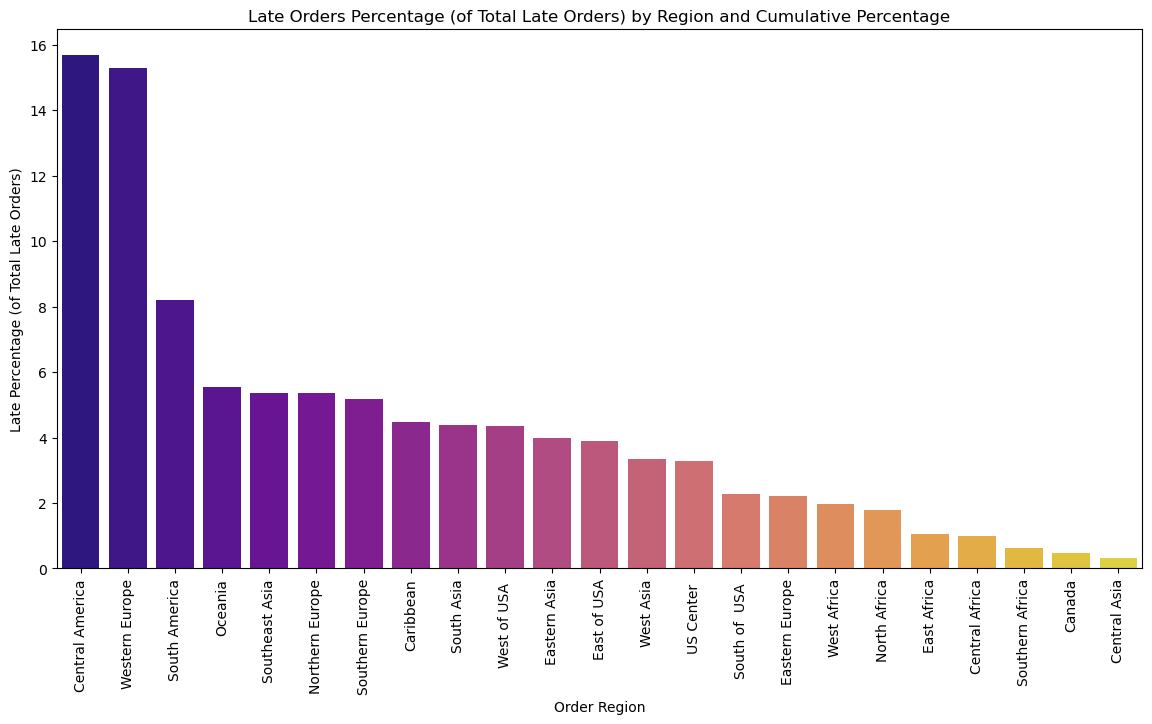

In [19]:
fig, ax1 = plt.subplots(figsize=(14, 7))

sns.barplot(x='Order Region', y='Late Percentage (of Total Late Orders)', data=region_summary_sorted, palette='plasma', ax=ax1)
ax1.set_title('Late Orders Percentage (of Total Late Orders) by Region and Cumulative Percentage')
ax1.set_xlabel('Order Region')
ax1.set_ylabel('Late Percentage (of Total Late Orders)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

In [38]:
selected_regions = ['Central America', 'Western Europe', 'South America', 'Oceania', 'Southeast Asia']
df_selected = df[df['Order Region'].isin(selected_regions)]


# Nhóm theo Khu vực Giao hàng và Phương thức Vận chuyển, và đếm số lượng đơn hàng giao trễ
late_orders_by_mode = df_selected[df_selected['Late_delivery_risk'] == 1].groupby(['Order Region', 'Shipping Mode']).size().reset_index(name='Late Orders')
print("Số lượng đơn hàng giao trễ theo từng Khu vực và Phương thức Vận chuyển:")
print(late_orders_by_mode)

# Tổng số đơn hàng theo Khu vực và Phương thức Vận chuyển
total_orders_by_mode = df_selected.groupby(['Order Region', 'Shipping Mode']).size().reset_index(name='Total Orders')
print("\nTổng số đơn hàng theo từng Khu vực và Phương thức Vận chuyển:")
print(total_orders_by_mode)


mode_summary = pd.merge(late_orders_by_mode, total_orders_by_mode, on=['Order Region', 'Shipping Mode'])


mode_summary['Late Percentage'] = (mode_summary['Late Orders'] / mode_summary['Total Orders']) * 100
print("\nBảng tổng hợp với tỷ lệ phần trăm đơn hàng giao trễ:")
print(mode_summary)


sorted_mode_summary = mode_summary.sort_values(by=['Order Region', 'Late Percentage'], ascending=[True, False])
print("\nBảng tổng hợp sắp xếp tỷ lệ phần trăm giảm dần theo khu vực:")
print(sorted_mode_summary)


regions = sorted_mode_summary['Order Region'].unique()
for region in regions:
    print(f"\nKhu vực: {region}")
    region_data = sorted_mode_summary[sorted_mode_summary['Order Region'] == region]
    print(region_data)


Số lượng đơn hàng giao trễ theo từng Khu vực và Phương thức Vận chuyển:
       Order Region   Shipping Mode  Late Orders
0   Central America     First Class         4185
1   Central America        Same Day          651
2   Central America    Second Class         4111
3   Central America  Standard Class         6571
4           Oceania     First Class         1270
5           Oceania        Same Day          263
6           Oceania    Second Class         1562
7           Oceania  Standard Class         2387
8     South America     First Class         2154
9     South America        Same Day          398
10    South America    Second Class         2122
11    South America  Standard Class         3437
12   Southeast Asia     First Class         1482
13   Southeast Asia        Same Day          184
14   Southeast Asia    Second Class         1395
15   Southeast Asia  Standard Class         2236
16   Western Europe     First Class         4107
17   Western Europe        Same Day          7


Bảng tổng hợp sắp xếp tỷ lệ phần trăm giảm dần theo khu vực:
       Order Region   Shipping Mode  Late Orders  Total Orders  \
0   Central America     First Class         4185          4382   
2   Central America    Second Class         4111          5481   
1   Central America        Same Day          651          1423   
3   Central America  Standard Class         6571         17055   
4           Oceania     First Class         1270          1366   
6           Oceania    Second Class         1562          2035   
5           Oceania        Same Day          263           647   
7           Oceania  Standard Class         2387          6100   
8     South America     First Class         2154          2311   
10    South America    Second Class         2122          2827   
9     South America        Same Day          398           776   
11    South America  Standard Class         3437          9021   
12   Southeast Asia     First Class         1482          1552   
14   Southeast

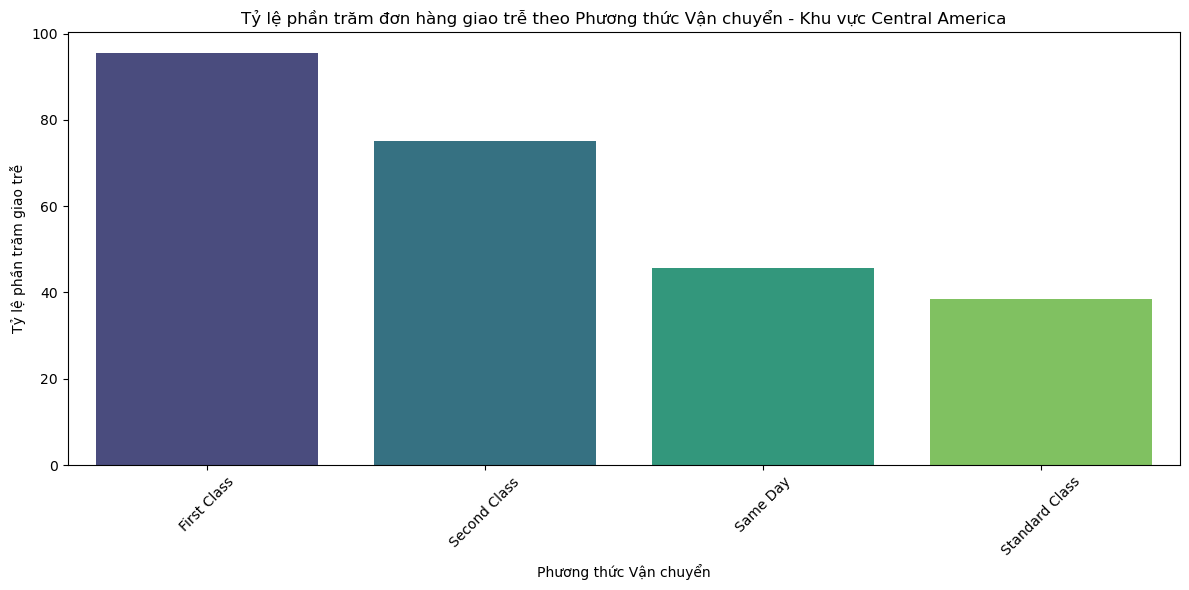

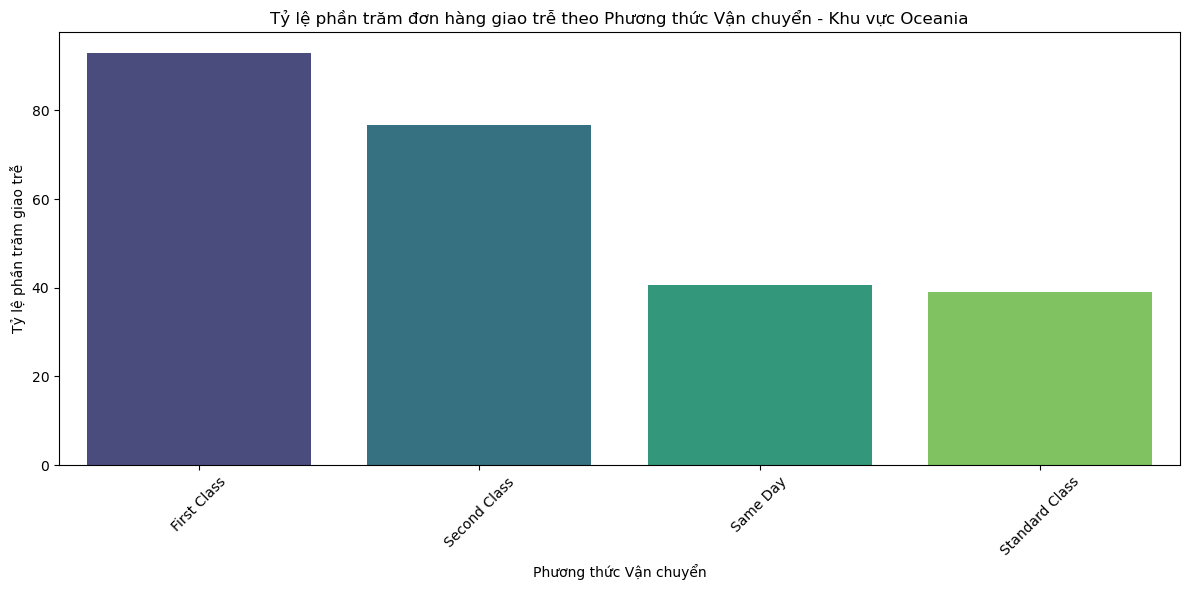

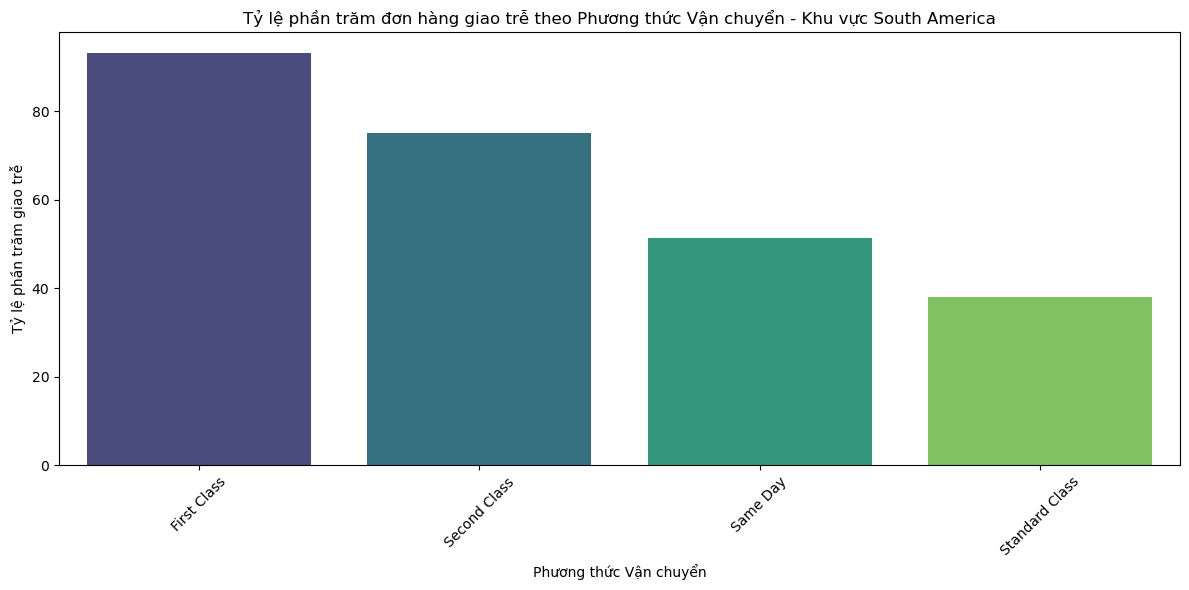

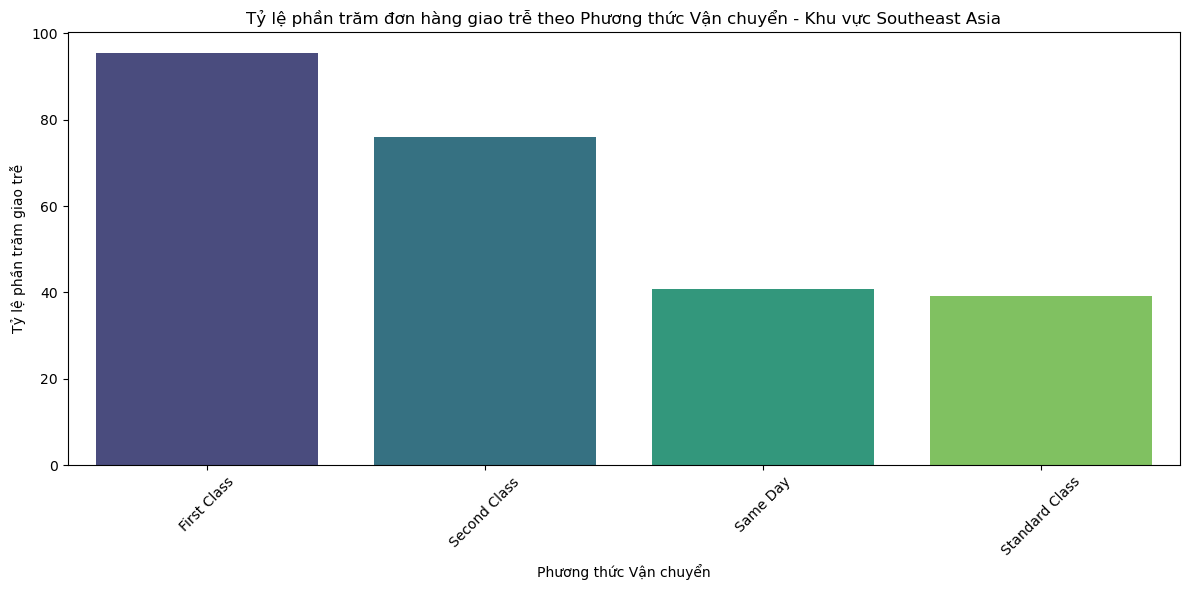

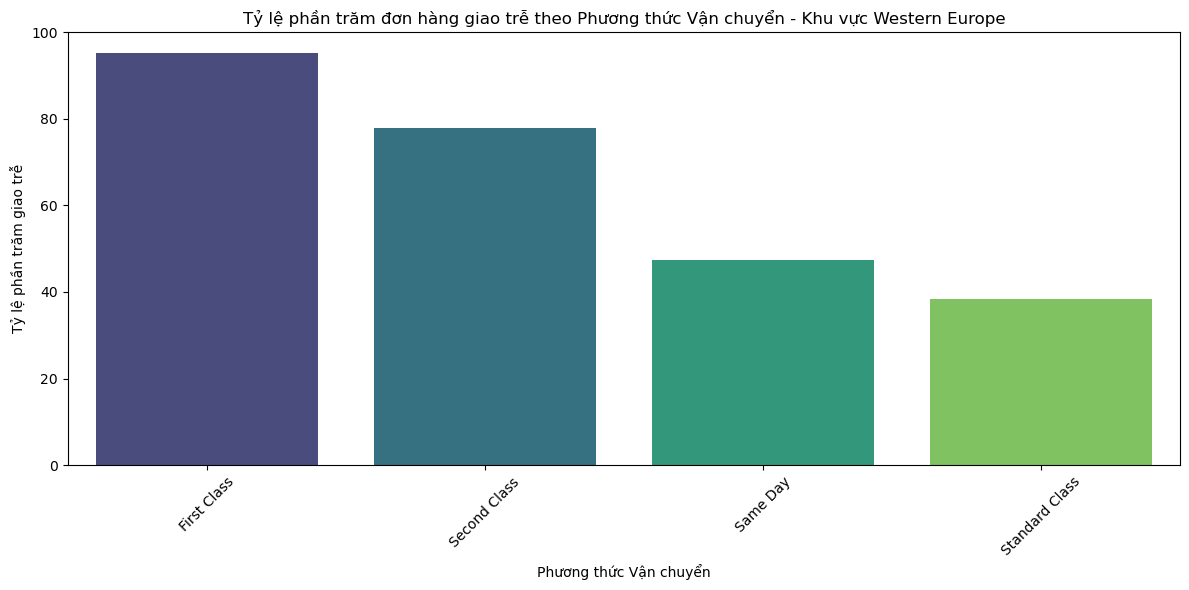

In [39]:

# Tính tỷ lệ phần trăm đơn hàng giao trễ
mode_summary['Late Percentage'] = (mode_summary['Late Orders'] / mode_summary['Total Orders']) * 100

# Sắp xếp tỷ lệ phần trăm giảm dần theo khu vực
sorted_mode_summary = mode_summary.sort_values(by=['Order Region', 'Late Percentage'], ascending=[True, False])
print("\nBảng tổng hợp sắp xếp tỷ lệ phần trăm giảm dần theo khu vực:")
print(sorted_mode_summary)


regions = sorted_mode_summary['Order Region'].unique()
for region in regions:
    region_data = sorted_mode_summary[sorted_mode_summary['Order Region'] == region]
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Shipping Mode', y='Late Percentage', data=region_data, palette='viridis')
    
    plt.title(f'Tỷ lệ phần trăm đơn hàng giao trễ theo Phương thức Vận chuyển - Khu vực {region}')
    plt.xlabel('Phương thức Vận chuyển')
    plt.ylabel('Tỷ lệ phần trăm giao trễ')
    plt.xticks(rotation=45)
    plt.tight_layout()
  
    plt.savefig(f'Late_Percentage_{region}.png', bbox_inches='tight')
    plt.show()

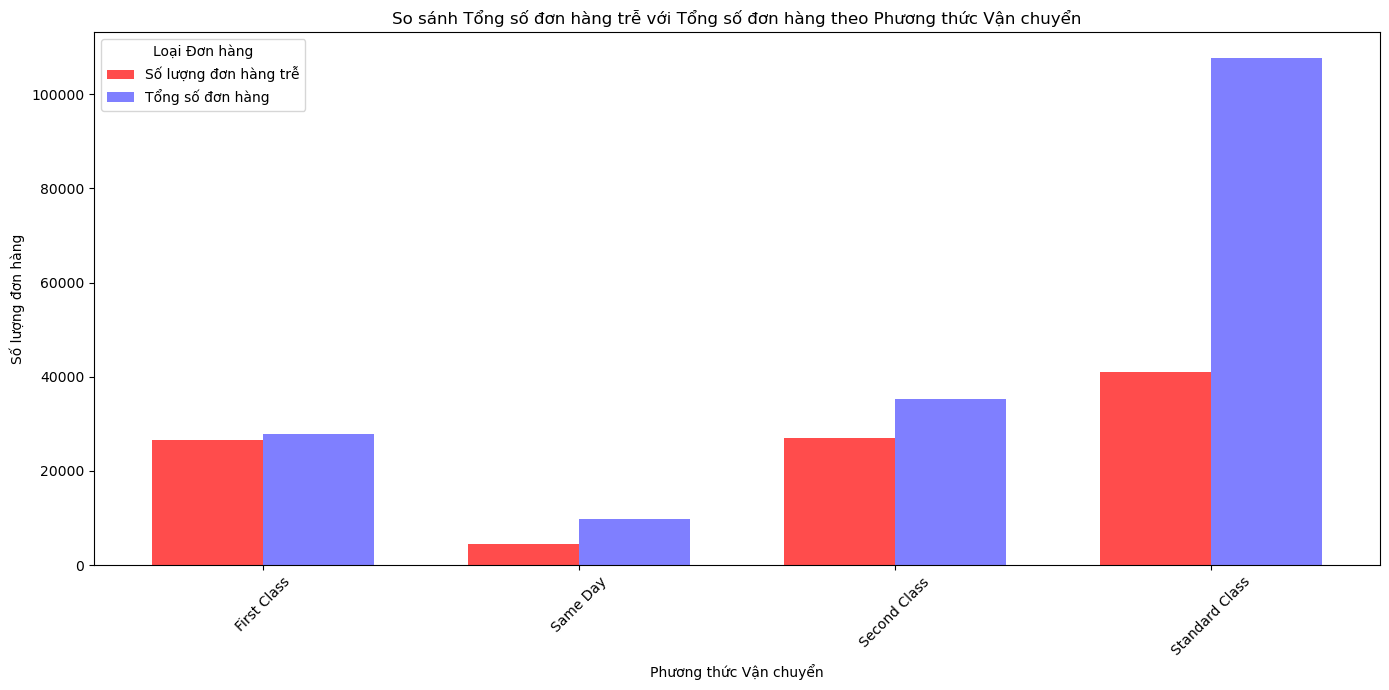

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Nhóm theo phương thức vận chuyển và đếm số lượng đơn hàng trễ
late_orders_by_mode = df[df['Late_delivery_risk'] == 1].groupby('Shipping Mode').size().reset_index(name='Late Orders')

# Tổng số đơn hàng theo phương thức vận chuyển
total_orders_by_mode = df.groupby('Shipping Mode').size().reset_index(name='Total Orders')

# Kết hợp dữ liệu số lượng đơn hàng trễ và tổng số đơn hàng
mode_summary = pd.merge(late_orders_by_mode, total_orders_by_mode, on='Shipping Mode')

# Vẽ biểu đồ cột tách biệt
plt.figure(figsize=(14, 7))

bar_width = 0.35  # Chiều rộng của cột
index = range(len(mode_summary))

# Vẽ cột cho số lượng đơn hàng trễ
plt.bar(index, mode_summary['Late Orders'], bar_width, label='Số lượng đơn hàng trễ', color='red', alpha=0.7)

# Vẽ cột cho tổng số đơn hàng
plt.bar([i + bar_width for i in index], mode_summary['Total Orders'], bar_width, label='Tổng số đơn hàng', color='blue', alpha=0.5)

plt.title('So sánh Tổng số đơn hàng trễ với Tổng số đơn hàng theo Phương thức Vận chuyển')
plt.xlabel('Phương thức Vận chuyển')
plt.ylabel('Số lượng đơn hàng')
plt.xticks([i + bar_width / 2 for i in index], mode_summary['Shipping Mode'], rotation=45)
plt.legend(title='Loại Đơn hàng')
plt.tight_layout()
plt.show()


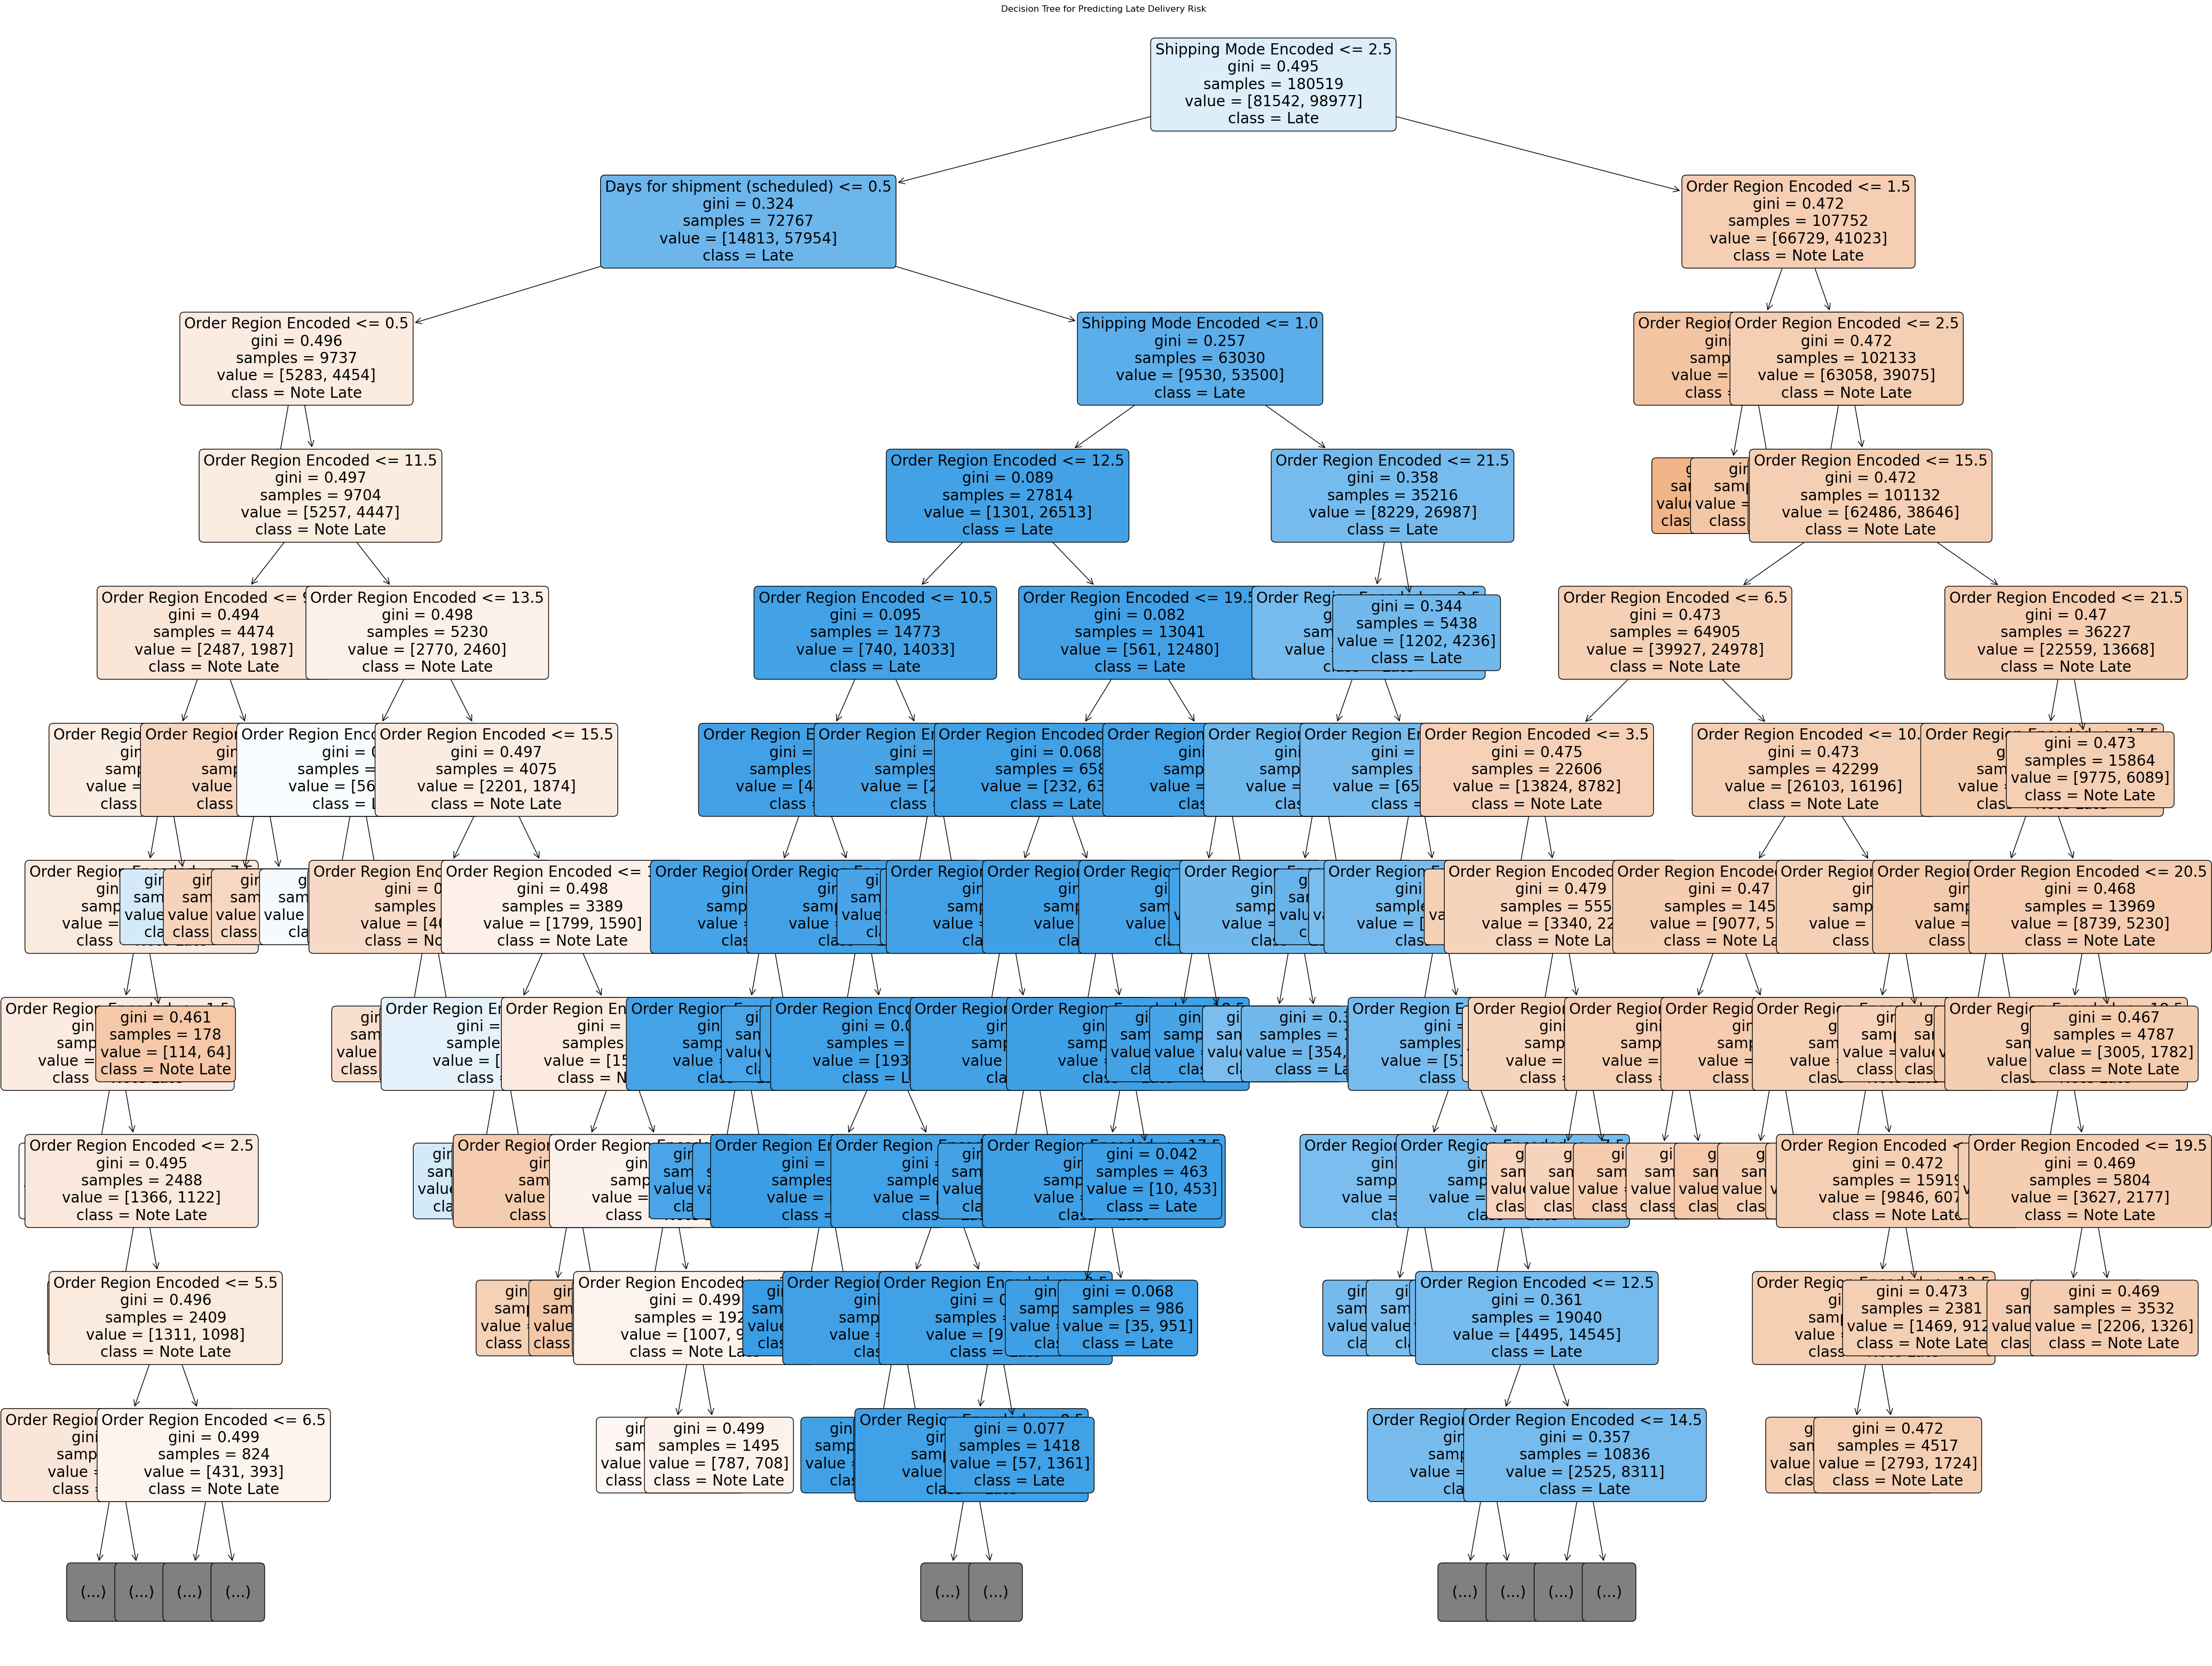

In [41]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

X = df[['Order Region Encoded', 'Shipping Mode Encoded', 'Days for shipment (scheduled)']]
y = df['Late_delivery_risk']


dt_model = DecisionTreeClassifier( random_state=42)
dt_model.fit(X, y)

# Vẽ cây quyết định
plt.figure(figsize=(50, 40))
plot_tree(dt_model, fontsize=20, max_depth= 10,
          feature_names=['Order Region Encoded', 'Shipping Mode Encoded', 'Days for shipment (scheduled)'], 
          class_names=['Note Late', 'Late'], 
          filled=True, 
          rounded=True)
plt.title('Decision Tree for Predicting Late Delivery Risk')
#plt.savefig('Cau4_decision_tree.png', bbox_inches='tight')
plt.show()


### Từ mô hình cây quyết định tiến hành đưa ra dự đoán cho dữ liệu mẫu tự khởi tạo

In [42]:
# Tạo dữ liệu ví dụ
data_example = pd.DataFrame({
    'Order Region': ['Canada'],
    'Shipping Mode': ['Second Class'],
    'Days for shipment (scheduled)': [5]
})

# Mã hóa Order Region
label_encoder_region = LabelEncoder()
label_encoder_region.fit(df['Order Region'])  # Đảm bảo fit với dữ liệu huấn luyện
data_example['Order Region Encoded'] = label_encoder_region.transform(data_example['Order Region'])

# Mã hóa Shipping Mode
label_encoder_shipping = LabelEncoder()
label_encoder_shipping.fit(df['Shipping Mode'])  # Đảm bảo fit với dữ liệu huấn luyện
data_example['Shipping Mode Encoded'] = label_encoder_shipping.transform(data_example['Shipping Mode'])

# Hiển thị dữ liệu ví dụ sau khi mã hóa
print("Dữ liệu ví dụ sau khi mã hóa:")
print(data_example)

Dữ liệu ví dụ sau khi mã hóa:
  Order Region Shipping Mode  Days for shipment (scheduled)  \
0       Canada  Second Class                              5   

   Order Region Encoded  Shipping Mode Encoded  
0                     0                      2  


In [43]:

X_example = data_example[['Order Region Encoded', 'Shipping Mode Encoded', 'Days for shipment (scheduled)']]
predictions = dt_model.predict(X_example)
predicted_probabilities = dt_model.predict_proba(X_example)

# Chuyển đổi dự đoán thành tên gốc
predictions_labels = ['On Time' if pred == 0 else 'Late' for pred in predictions]

# Tạo bảng kết quả
result = pd.DataFrame({
    'Order Region': data_example['Order Region'],
    'Shipping Mode': data_example['Shipping Mode'],
    'Days for shipment (scheduled)': data_example['Days for shipment (scheduled)'],
    'Dự đoán': predictions_labels,
    'Xác suất On Time': predicted_probabilities[:, 0],
    'Xác suất Late': predicted_probabilities[:, 1]
})

print("Kết quả dự đoán:")
for index, row in result.iterrows():
    print(f"Order Region: {row['Order Region']}")
    print(f"Shipping Mode: {row['Shipping Mode']}")
    print(f"Days for shipment (scheduled): {row['Days for shipment (scheduled)']}")
    print(f"Dự đoán: {row['Dự đoán']}")
    print(f"Xác suất On Time: {row['Xác suất On Time']:.2f}")
    print(f"Xác suất Late: {row['Xác suất Late']:.2f}")
    print()

Kết quả dự đoán:
Order Region: Canada
Shipping Mode: Second Class
Days for shipment (scheduled): 5
Dự đoán: Late
Xác suất On Time: 0.25
Xác suất Late: 0.75

